<a href="https://colab.research.google.com/github/astrrr/ML-Lab/blob/main/Lab2ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import chi2

**2.1 Data exploration**



*   Read .csv file






In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv",sep=",")

In [4]:
df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes




*   Remove customerID




In [5]:
del df['customerID']

In [6]:
df

,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,Male,0,34,4,One year,No,56.95,1889.50,No
2,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,45,4,One year,No,42.30,1840.75,No
4,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes




*   View Variable info



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   ServiceCount      7043 non-null   int64  
 4   Contract          7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7016 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 495.3+ KB




*   Fill NA



In [8]:
TotalCharges_medians = df['TotalCharges'].median()
print(TotalCharges_medians)

1397.1


In [10]:
df['TotalCharges'].fillna(TotalCharges_medians,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   ServiceCount      7043 non-null   int64  
 4   Contract          7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 495.3+ KB




   **2.2 Remove variables with High Variable Correlation**





*   Create data frame of continuous data coloumns 




In [14]:
ctn_data = df[['tenure','ServiceCount', 'MonthlyCharges','TotalCharges']]

In [15]:
ctn_data

,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,1,2,29.85,29.85
1,34,4,56.95,1889.50
2,2,4,53.85,108.15
3,45,4,42.30,1840.75
4,2,2,70.70,151.65
...,...,...,...,...
7038,24,8,84.80,1990.50
7039,72,7,103.20,7362.90
7040,11,2,29.60,346.45
7041,4,3,74.40,306.60




*   Calulate correlation between variable




In [17]:
cor_data = ctn_data.corr()

In [18]:
cor_data

,tenure,ServiceCount,MonthlyCharges,TotalCharges
tenure,1.000000,0.508526,0.247900,0.824067
ServiceCount,0.508526,1.000000,0.041463,0.442010
MonthlyCharges,0.247900,0.041463,1.000000,0.649631
TotalCharges,0.824067,0.442010,0.649631,1.000000




*   plot heatmap




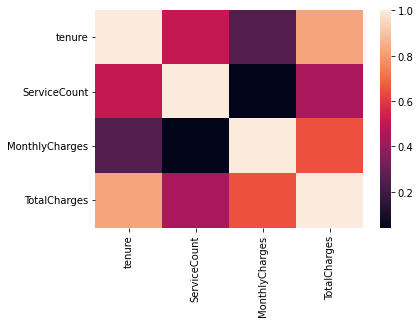

In [19]:
sns.heatmap(cor_data)



*   Reduce Corr() to Lower Matrix






In [20]:
lower = pd.DataFrame(np.tril(cor_data, -1), columns=cor_data.columns)

In [21]:
lower

,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,0.000000,0.000000,0.000000,0.0
1,0.508526,0.000000,0.000000,0.0
2,0.247900,0.041463,0.000000,0.0
3,0.824067,0.442010,0.649631,0.0




*   Drop columns if correlation value > 0.6




In [28]:
to_drop = []
for column in lower.columns:
  for i in lower[column]:
    if i > 0.6 :
     to_drop.append(column)

In [30]:
to_drop

['tenure', 'MonthlyCharges']

In [31]:
df.drop(to_drop, inplace=True, axis=1)

In [32]:
df

,gender,SeniorCitizen,ServiceCount,Contract,PaperlessBilling,TotalCharges,Churn
0,Female,0,2,Month-to-month,Yes,29.85,No
1,Male,0,4,One year,No,1889.50,No
2,Male,0,4,Month-to-month,Yes,108.15,Yes
3,Male,0,4,One year,No,1840.75,No
4,Female,0,2,Month-to-month,Yes,151.65,Yes
...,...,...,...,...,...,...,...
7038,Male,0,8,One year,Yes,1990.50,No
7039,Female,0,7,One year,Yes,7362.90,No
7040,Female,0,2,Month-to-month,Yes,346.45,No
7041,Male,1,3,Month-to-month,Yes,306.60,Yes




*   Show statistics




In [33]:
df.describe()

,SeniorCitizen,ServiceCount,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,5.446259,2279.194562
std,0.368612,1.964916,2261.820939
min,0.000000,1.000000,18.800000
25%,0.000000,4.000000,403.775000
50%,0.000000,6.000000,1397.100000
75%,0.000000,7.000000,3778.050000
max,1.000000,9.000000,8684.800000
